# Network Creation

Let's create a small Neural Network with 3 hidden layers for testing

In [1]:
import numpy as np
import pandas as pd
from NeuralNetwork import *
from utils import *
import warnings
# to ignore pandas warning
warnings.simplefilter(action='ignore', category=FutureWarning)

end Training
Mse: mean = 4.2814999120985355, Var = 0.0
Error: mean = 2.493621006033588, std = 0.0


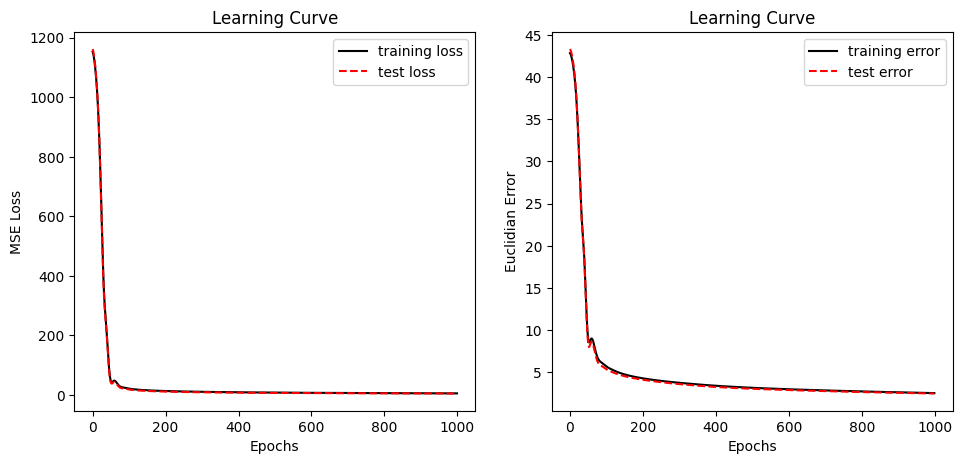

In [9]:
col_names = ('Input1', 'Input2', 'Input3', 'Input4', 'Input5', 'Input6',
             'Input7', 'Input8', 'Input9', 'Input10', 'TARGET_x', 'TARGET_y', 'TARGET_z')
data = pd.read_csv("../ML-23-PRJ-Package/ML-CUP23-TR.csv",
                   skiprows=7, usecols=[i for i in range(1, 14)], names=col_names)

data = data.sample(frac=1)
#SPLIT 80/20 FOR TRAIN/TEST
folds = np.array_split(data, 5)
tr_data = pd.concat(folds[1:])
test_data = folds[0]

epochs=1000
params={
    "eta" : 0.00009,
    "mb" : 400,
    "momentum" : 0.95,
    "epochs" : epochs,
    "clip_value" : None,
    "hid_act_fun" : "relu",
    "out_act_fun" : "linear",
    "cost_fun" : "mse",
    "ridge_lambda": None,
    "lasso_lambda": None,
    "decay_max_steps": None,
    "decay_min_value": None
}

n=1
test_errors=np.zeros((n,epochs))
training_errors=np.zeros((n,epochs))
acc_test_errors=np.zeros((n,epochs))
acc_train_errors=np.zeros((n,epochs))
for i in range(n):
    net = NeuralNetwork()

    n_inputs = tr_data.shape[1] - 3

    net.add_input_layer(n_inputs)

    net.add_hidden_layer(n_inputs, 100)
   # net.add_hidden_layer(50, 50)

    net.add_output_layer(100, 3)
    test_error,training_error,acc_test,acc_train=net.train(tr_data,params,test_data=test_data, outFun2="eucl")
    test_errors[i]=test_error
    training_errors[i]=training_error
    acc_test_errors[i]=acc_test
    acc_train_errors[i]=acc_train

print(f"Mse: mean = {np.mean(test_errors[:,-1])}, Var = {np.var(test_errors[:,-1])}")
print(f"Error: mean = {np.mean(acc_test_errors[:,-1])}, std = {np.std(acc_test_errors[:,-1])}")

fig,axs = plt.subplots(1,2,figsize=(10,5))

plot_loss_Monk(training_error,"mse",axs[0],test_losses=test_error)
plot_loss_Monk(acc_train,"eucl",axs[1],test_losses=acc_test)


fig.tight_layout(pad=2.0)
plt.show()


In [ ]:
%%time
grid={
    "eta" : [0.001,0.01],
    "mb" : [64,128,256,700],
    "momentum" : [0.9],
    "n_layers" : [2],
    "n_neurons" : [25,50,75,110,125,150],
    "epochs" : [500],
    "clip_value" : [None],
    "hid_act_fun" : ["relu"],
    "out_act_fun" : ["linear"],
    "cost_fun" : ["mse"],
    "ridge_lambda": [None],
    "lasso_lambda": [None],
    "decay_max_steps": [None],
    "decay_min_value": [None],
    "es_patience": [30]
}

col_names = ('Input1', 'Input2', 'Input3', 'Input4', 'Input5', 'Input6',
             'Input7', 'Input8', 'Input9', 'Input10', 'TARGET_x', 'TARGET_y', 'TARGET_z')
data = pd.read_csv("../ML-23-PRJ-Package/ML-CUP23-TR.csv",
                   skiprows=7, usecols=[i for i in range(1, 14)], names=col_names)

data = data.sample(frac=1)
#SPLIT 80/20 FOR TRAIN/TEST
folds = np.array_split(data,10 )
tr_data = pd.concat(folds[2:8])
test_data = pd.concat(folds[0:1])
es_data=folds[9]

search_space=get_search_space(grid)
print(len(search_space))
parallel_grid_search(5, tr_data,es_data, search_space, 10, 3)